In [1]:
import tensorflow as tf

def residual_block(x, filters, kernel_size=3, stride=1, padding='same'):
    shortcut = x
    
    x = tf.keras.layers.Conv2D(filters, kernel_size, strides=stride, padding=padding, kernel_initializer='he_normal')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.ReLU()(x)
    
    x = tf.keras.layers.Conv2D(filters, kernel_size, strides=1, padding=padding, kernel_initializer='he_normal')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    
    if stride != 1 or shortcut.shape[3] != filters:
        shortcut = tf.keras.layers.Conv2D(filters, kernel_size=1, strides=stride, padding=padding, kernel_initializer='he_normal')(shortcut)
        shortcut = tf.keras.layers.BatchNormalization()(shortcut)
    
    x = tf.keras.layers.Add()([x, shortcut])
    x = tf.keras.layers.ReLU()(x)
    
    return x

def build_resnet18(input_shape=(1,), num_classes=1):
    inputs = tf.keras.layers.Input(shape=input_shape)
    x = tf.keras.layers.Reshape((1, 1, input_shape[0]))(inputs)
    
    # Stage 1
    x = tf.keras.layers.Conv2D(64, kernel_size=7, strides=2, padding='same', kernel_initializer='he_normal')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.ReLU()(x)
    x = tf.keras.layers.MaxPool2D(pool_size=3, strides=2, padding='same')(x)
    
    # Stage 2
    x = residual_block(x, filters=64, stride=1)
    x = residual_block(x, filters=64, stride=1)
    
    # Stage 3
    x = residual_block(x, filters=128, stride=2)
    x = residual_block(x, filters=128, stride=1)
    
    # Stage 4
    x = residual_block(x, filters=256, stride=2)
    x = residual_block(x, filters=256, stride=1)
    
    # Stage 5
    x = residual_block(x, filters=512, stride=2)
    x = residual_block(x, filters=512, stride=1)
    
    # Output layer
    x = tf.keras.layers.GlobalAvgPool2D()(x)
    outputs = tf.keras.layers.Dense(num_classes)(x)
    
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    
    return model


In [2]:
model = build_resnet18()
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some data points for cosine function
x = np.linspace(-np.pi, np.pi, 1000)
y = np.cos(x)


In [4]:

# Train the model1 on the generated data
history = model.fit(x, y, epochs=100, verbose=0)

# Evaluate the model1 on the training data
train_loss = model.evaluate(x, y, verbose=0)

Training Loss: 0.0161
32/32 [==============================] - 0s 5ms/step


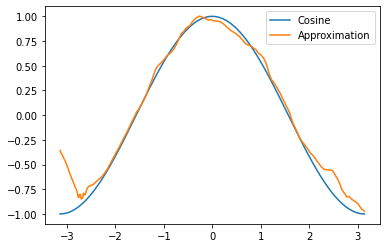

In [5]:
#print(train_loss)
print(f'Training Loss: {train_loss[0]:.4f}')

# Plot the results
plt.plot(x, y, label='Cosine')
plt.plot(x, model.predict(x), label='Approximation')
plt.legend()
plt.show()

In [6]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Generate some training data
# x_train = np.random.uniform(low=-1, high=1, size=(1000, 1))
# y_train = np.cos(x_train)
# Generate some data points for cosine function
x_train = np.linspace(-np.pi, np.pi, 1000)
y_train = np.cos(x_train)

In [7]:
#Simple Resnet Model
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(64,input_shape=(1,)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64,activation='sigmoid'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64,activation='sigmoid'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1,),
])

# Compile the model
model2.compile(optimizer='adam', loss='mse')

# Train the model
model2.fit(x_train, y_train, epochs=100, batch_size=32, verbose=0)

# Evaluate the model1 on the training data
train_loss2 = model2.evaluate(x_train, y_train, verbose=0)

Training Loss: 0.0011
32/32 [==============================] - 0s 976us/step


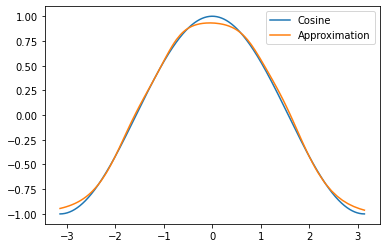

In [8]:
print(f'Training Loss: {train_loss2:.4f}')

# Plot the results
plt.plot(x_train, y_train, label='Cosine')
plt.plot(x_train, model2.predict(x_train), label='Approximation')
plt.legend()
plt.show()

In [9]:
# Generate some data points for cosine function
x_train = np.linspace(-10, 10, 9000)
y_train = np.cos(x_train)

In [10]:
#Simple Resnet Model
model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(64,input_shape=(1,)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64,activation='sigmoid'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64,activation='sigmoid'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1,),
])

# Compile the model
model3.compile(optimizer='adam', loss='mse')

# Train the model
model3.fit(x_train, y_train, epochs=100, batch_size=32, verbose=0)

# Evaluate the model1 on the training data
train_loss3 = model3.evaluate(x_train, y_train, verbose=0)

Training Loss: 0.0079
282/282 [==============================] - 0s 1ms/step


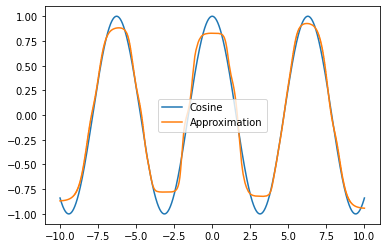

In [11]:
print(f'Training Loss: {train_loss3:.4f}')

# Plot the results
plt.plot(x_train, y_train, label='Cosine')
plt.plot(x_train, model3.predict(x_train), label='Approximation')
plt.legend()
plt.show()

In [1]:
import tensorflow as tf

def residual_block(x, filters, kernel_size=3, stride=1, padding='same'):
    shortcut = x
    
    x = tf.keras.layers.Conv2D(filters, kernel_size, strides=stride, padding=padding, kernel_initializer='he_normal')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.ReLU()(x)
    
    x = tf.keras.layers.Conv2D(filters, kernel_size, strides=1, padding=padding, kernel_initializer='he_normal')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    
    if stride != 1 or shortcut.shape[3] != filters:
        shortcut = tf.keras.layers.Conv2D(filters, kernel_size=1, strides=stride, padding=padding, kernel_initializer='he_normal')(shortcut)
        shortcut = tf.keras.layers.BatchNormalization()(shortcut)
    
    x = tf.keras.layers.Add()([x, shortcut])
    #x = tf.keras.layers.ReLU()(x)
    
    return x

def build_resnet18(input_shape=(1,), num_classes=1):
    inputs = tf.keras.layers.Input(shape=input_shape)
    x = tf.keras.layers.Reshape((1, 1, input_shape[0]))(inputs)
    
    # Stage 1
    x = tf.keras.layers.Conv2D(64, kernel_size=7, strides=2, padding='same', kernel_initializer='he_normal')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.ReLU()(x)
    x = tf.keras.layers.MaxPool2D(pool_size=3, strides=2, padding='same')(x)
    
    # Stage 2
    x = residual_block(x, filters=64, stride=1)
    x = residual_block(x, filters=64, stride=1)
    
    # Stage 3
    x = residual_block(x, filters=128, stride=2)
    x = residual_block(x, filters=128, stride=1)
    
    # Stage 4
    x = residual_block(x, filters=256, stride=2)
    x = residual_block(x, filters=256, stride=1)
    
    # Stage 5
    x = residual_block(x, filters=512, stride=2)
    x = residual_block(x, filters=512, stride=1)
    
    # Output layer
    x = tf.keras.layers.GlobalAvgPool2D()(x)
    outputs = tf.keras.layers.Dense(num_classes)(x)
    
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    
    return model


In [2]:
model4 = build_resnet18()
model4.compile(optimizer='adam', loss='mse', metrics=['accuracy'])


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some data points for cosine function
x = np.linspace(-np.pi, np.pi, 1000)
y = np.cos(x)


In [5]:

# Train the model1 on the generated data
history = model4.fit(x, y, epochs=100, verbose=0)

# Evaluate the model1 on the training data
train_loss = model4.evaluate(x, y, verbose=0)

Training Loss: 0.0266
32/32 [==============================] - 6s 190ms/step


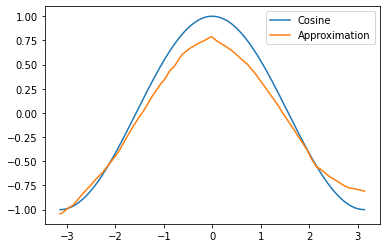

In [6]:
#print(train_loss)
print(f'Training Loss: {train_loss[0]:.4f}')

# Plot the results
plt.plot(x, y, label='Cosine')
plt.plot(x, model4.predict(x), label='Approximation')
plt.legend()
plt.show()

In [21]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model

class PolynomialActivation(tf.keras.layers.Layer):
    def __init__(self, degree):
        super(PolynomialActivation, self).__init__()
        self.degree = degree

    def call(self, inputs):
        return tf.math.pow(inputs, self.degree)

def build_polynomial_network(input_shape=(1,), degree=2):
    inputs = Input(shape=input_shape)
    x = Dense(units=32)(inputs)
    x = PolynomialActivation(degree=degree)(x)
    x = Dense(units=64)(x)
    x = PolynomialActivation(degree=degree)(x)
    x = Dense(units=128)(x)
    x = PolynomialActivation(degree=degree)(x)
    x = Dense(units=64)(x)
    x = PolynomialActivation(degree=degree)(x)
    x = Dense(units=32)(x)
    x = PolynomialActivation(degree=degree)(x)
    x = Dense(units=1)(x)
    model = Model(inputs, x)
    return model

degree = 2
polynomial_network = build_polynomial_network(degree=degree)
polynomial_network.compile(optimizer='adam', loss='mse')


In [22]:
import numpy as np
import matplotlib.pyplot as plt


# Generate some data points for cosine function
x = np.linspace(-np.pi, np.pi, 1000)
y = np.cos(x)

# Train the model1 on the generated data
history = polynomial_network.fit(x, y, epochs=100, verbose=0)

# Evaluate the model1 on the training data
train_loss = polynomial_network.evaluate(x, y, verbose=0)

Training Loss: 0.0000
32/32 [==============================] - 0s 8ms/step


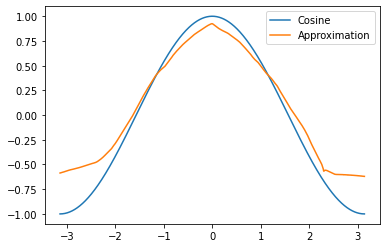

In [23]:
#print(train_loss)
print(f'Training Loss: {train_loss:.4f}')

# Plot the results
plt.plot(x, y, label='Cosine')
plt.plot(x, model4.predict(x), label='Approximation')
plt.legend()
plt.show()

Epoch 1/500
32/32 - 3s - loss: 2.7222 - val_loss: 2.2626 - 3s/epoch - 95ms/step
Epoch 2/500
32/32 - 0s - loss: 2.7121 - val_loss: 2.2531 - 478ms/epoch - 15ms/step
Epoch 3/500
32/32 - 0s - loss: 2.5915 - val_loss: 2.2495 - 464ms/epoch - 14ms/step
Epoch 4/500
32/32 - 0s - loss: 2.2478 - val_loss: 2.2550 - 460ms/epoch - 14ms/step
Epoch 5/500
32/32 - 0s - loss: 2.0927 - val_loss: 2.2609 - 455ms/epoch - 14ms/step
Epoch 6/500
32/32 - 0s - loss: 2.0852 - val_loss: 2.2665 - 466ms/epoch - 15ms/step
Epoch 7/500
32/32 - 1s - loss: 2.0991 - val_loss: 2.2686 - 556ms/epoch - 17ms/step
Epoch 8/500
32/32 - 1s - loss: 2.0939 - val_loss: 2.2727 - 563ms/epoch - 18ms/step
Epoch 9/500
32/32 - 1s - loss: 2.0937 - val_loss: 2.2754 - 539ms/epoch - 17ms/step
Epoch 10/500
32/32 - 1s - loss: 2.0701 - val_loss: 2.2772 - 748ms/epoch - 23ms/step
Epoch 11/500
32/32 - 1s - loss: 2.0503 - val_loss: 2.2803 - 520ms/epoch - 16ms/step
Epoch 12/500
32/32 - 0s - loss: 2.0922 - val_loss: 2.2671 - 480ms/epoch - 15ms/step
Epoc

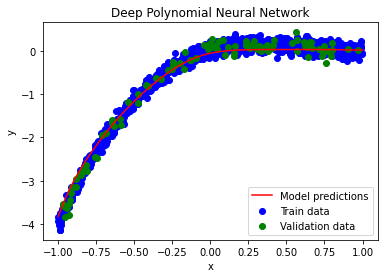

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, regularizers
import matplotlib.pyplot as plt

class PolynomialActivation(layers.Layer):
    def __init__(self, degree, regularization=None, clip_value=None):
        super(PolynomialActivation, self).__init__()
        self.degree = degree
        self.regularization = regularization
        self.clip_value = clip_value

    def build(self, input_shape):
        self.coefficients = self.add_weight("coefficients",
                                            shape=(self.degree + 1,),
                                            initializer=tf.keras.initializers.RandomUniform(-0.1, 0.1),
                                            trainable=True,
                                            regularizer=self.regularization)

    def call(self, inputs):
        outputs = 0
        for n in range(self.degree + 1):
            term = self.coefficients[n] * tf.pow(inputs, n)
            if self.clip_value is not None:
                term = tf.clip_by_value(term, -self.clip_value, self.clip_value)
            outputs += term
        return outputs

def create_deep_polynomial_network(input_dim, depth, degree, regularization=None, clip_value=None):
    inputs = layers.Input(shape=(input_dim,))
    x = inputs
    for _ in range(depth):
        x = PolynomialActivation(degree, regularization, clip_value)(x)
        x = layers.BatchNormalization()(x)
    outputs = x

    model = models.Model(inputs=inputs, outputs=outputs)
    return model

input_dim = 1
depth = 5
degree = 3
regularization = regularizers.l1_l2(l1=0.01, l2=0.01)

deep_polynomial_network = create_deep_polynomial_network(input_dim, depth, degree, regularization, clip_value=10.0)

def generate_data(num_samples, noise=0.1):
    x = np.random.uniform(-1, 1, num_samples)
    y = x**3 - 2*x**2 + x + noise * np.random.randn(num_samples)
    return x.reshape(-1, 1), y.reshape(-1, 1)

num_train_samples = 1000
num_val_samples = 100

x_train, y_train = generate_data(num_train_samples)
x_val, y_val = generate_data(num_val_samples)

deep_polynomial_network.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss='mean_squared_error')

history = deep_polynomial_network.fit(
    x_train, y_train,
    epochs=500,
    batch_size=32,
    validation_data=(x_val, y_val),
    verbose=2
)

x_test = np.linspace(-1, 1, 100).reshape(-1, 1)
y_test = deep_polynomial_network.predict(x_test)

plt.scatter(x_train, y_train, c='blue', label='Train data')
plt.scatter(x_val, y_val, c='green', label='Validation data')
plt.plot(x_test, y_test, c='red', label='Model predictions')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Deep Polynomial Neural Network')
plt.show()


In [32]:
import tensorflow as tf
from tensorflow.keras import layers, models

def poly_act(x, power=2):
    return tf.math.pow(x, power)

def res_block(inputs, filters, activation):
    x = layers.Dense(filters, kernel_initializer='he_normal')(inputs)
    x = layers.BatchNormalization()(x)
    x = activation(x)

    x = layers.Dense(filters, kernel_initializer='he_normal')(x)
    x = layers.BatchNormalization()(x)

    skip = layers.Dense(filters, kernel_initializer='he_normal')(inputs)
    skip = layers.BatchNormalization()(skip)

    x = layers.Add()([x, skip])
    x = activation(x)
    return x

def build_resnet18(input_shape, activation=poly_act):
    inputs = layers.Input(shape=input_shape)

    x = layers.Dense(64, kernel_initializer='he_normal')(inputs)
    x = layers.BatchNormalization()(x)
    x = activation(x)

    x = res_block(x, 64, activation)
    x = res_block(x, 64, activation)

    x = res_block(x, 128, activation)
    x = res_block(x, 128, activation)

    x = res_block(x, 256, activation)
    x = res_block(x, 256, activation)

    x = res_block(x, 512, activation)
    x = res_block(x, 512, activation)

    x = layers.GlobalAveragePooling1D()(tf.expand_dims(x, 1))  # Add the missing dimension
    x = layers.Dense(1, activation='linear')(x)

    model = models.Model(inputs=inputs, outputs=x)
    return model



# Create the model
input_shape = (1,)
model = build_resnet18(input_shape, activation=poly_act)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Print the model summary
model.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 dense_52 (Dense)               (None, 64)           128         ['input_3[0][0]']                
                                                                                                  
 batch_normalization_50 (BatchN  (None, 64)          256         ['dense_52[0][0]']               
 ormalization)                                                                                    
                                                                                                  
 tf.math.pow_34 (TFOpLambda)    (None, 64)           0           ['batch_normalization_50[0]

In [6]:
import numpy as np
import matplotlib.pyplot as plt


# Generate dataset
num_samples = 10000
x_train = np.random.uniform(-1, 1, num_samples)
y_train = np.cos(x_train)

# Reshape the inputs to match the expected input shape
x_train = x_train.reshape(-1, 1)


In [48]:
# Train the model
epochs = 100
batch_size = 64
validation_split = 0.2
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=validation_split)


Epoch 1/100
13/13 [==============================] - 3s 67ms/step - loss: 0.2206 - mae: 0.3656 - val_loss: 5.4962 - val_mae: 1.5397
Epoch 2/100
13/13 [==============================] - 1s 47ms/step - loss: 0.1077 - mae: 0.2535 - val_loss: 2.6079 - val_mae: 1.0666
Epoch 3/100
13/13 [==============================] - 1s 43ms/step - loss: 0.0753 - mae: 0.2063 - val_loss: 2.3648 - val_mae: 0.9586
Epoch 4/100
13/13 [==============================] - 1s 42ms/step - loss: 0.0596 - mae: 0.1824 - val_loss: 0.2133 - val_mae: 0.3853
Epoch 5/100
13/13 [==============================] - 1s 47ms/step - loss: 0.0376 - mae: 0.1461 - val_loss: 0.2703 - val_mae: 0.4524
Epoch 6/100
13/13 [==============================] - 1s 46ms/step - loss: 0.0392 - mae: 0.1454 - val_loss: 0.1607 - val_mae: 0.3430
Epoch 7/100
13/13 [==============================] - 1s 44ms/step - loss: 0.0252 - mae: 0.1244 - val_loss: 0.1220 - val_mae: 0.3105
Epoch 8/100
13/13 [==============================] - 1s 43ms/step - loss: 0.

KeyboardInterrupt: 

In [4]:
# Predict cosine value for a new input
new_input = np.array([[0.5]])
cosine_prediction = model.predict(new_input)
print("Cosine prediction for 0.5:", cosine_prediction)


1/1 [==============================] - 1s 511ms/step
Cosine prediction for 0.5: [[0.85147977]]


In [38]:
print(np.cos(-0.1796))
print(model.predict(np.array([[-0.1796]])))

0.9839152259080877
1/1 [==============================] - 0s 17ms/step
[[0.]]


4/4 [==============================] - 0s 34ms/step


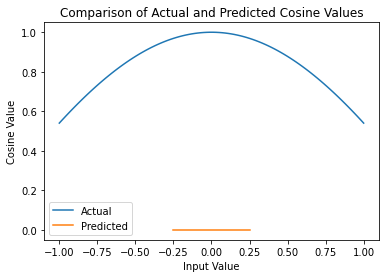

In [40]:
import matplotlib.pyplot as plt

# Generate test input values
num_test_samples = 100
x_test = np.linspace(-1, 1, num_test_samples).reshape(-1, 1)

# Calculate actual cosine values
y_actual = np.cos(x_test)

# Predict cosine values using the trained model
y_predicted = model.predict(x_test)

# Plot actual and predicted cosine values
plt.plot(x_test, y_actual, label='Actual')
plt.plot(x_test, y_predicted, label='Predicted')
plt.xlabel('Input Value')
plt.ylabel('Cosine Value')
plt.legend()
plt.title('Comparison of Actual and Predicted Cosine Values')
plt.show()


In [47]:
# Update the activation function
def leaky_relu(x):
    return tf.keras.activations.relu(x, alpha=0.1)

# Create the model
model = build_resnet18(input_shape, activation=leaky_relu)

# Compile the model with a lower learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

# Generate dataset with a smaller range
num_samples = 1000
x_train = np.random.uniform(-np.pi/2, np.pi/2, num_samples)
y_train = np.cos(x_train)

# Reshape the inputs to match the expected input shape
x_train = x_train.reshape(-1, 1)

# Train the model
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=validation_split)

# Generate test input values
num_test_samples = 100
x_test = np.linspace(-np.pi/2, np.pi/2, num_test_samples).reshape(-1, 1)

# Calculate actual cosine values
y_actual = np.cos(x_test)

# Predict cosine values using the trained model
y_predicted = model.predict(x_test)

# Plot actual and predicted cosine values
plt.plot(x_test, y_actual, label='Actual')
plt.plot(x_test, y_predicted, label='Predicted')
plt.xlabel('Input Value')
plt.ylabel('Cosine Value')
plt.legend()
plt.title('Comparison of Actual and Predicted Cosine Values')
plt.show()


Epoch 1/100
25/25 [==============================] - 4s 55ms/step - loss: 1.8999 - mae: 0.9938 - val_loss: 2.6020 - val_mae: 1.3032
Epoch 2/100
25/25 [==============================] - 1s 34ms/step - loss: 0.6921 - mae: 0.6424 - val_loss: 4.0705 - val_mae: 1.6152
Epoch 3/100
 7/25 [=======>......................] - ETA: 0s - loss: 0.5535 - mae: 0.5582

KeyboardInterrupt: 

In [45]:
print(np.cos(0.8))
print(model.predict(np.array([[0.8]])))

0.6967067093471654
1/1 [==============================] - 0s 17ms/step
[[0.67963237]]
